In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
with open('fitting_ap_offsets.pkl','rb') as pklin:
    allofdata = pkl.load(pklin)

14.222222222222221
0 1.966452205885543 -0.08823529411775434
1 1.334099264707701 48.154411764810924
2 0.7561580882358536 80.55147058841096
3 0.19439338235227815 96.1397058825626
4 -0.2673713223723443 100.22794116779258
5 -0.8306066166836324 91.38970587512725
6 -1.3967830883032162 69.32352941227413
7 -2.0085477941231185 29.911764705947597


<Figure size 432x288 with 0 Axes>

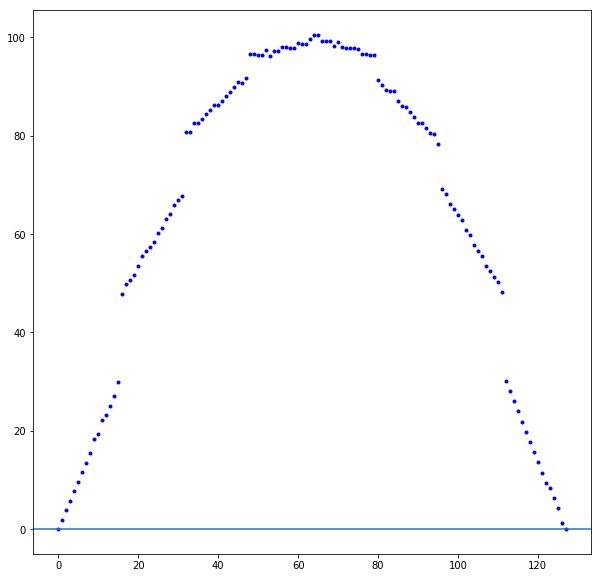

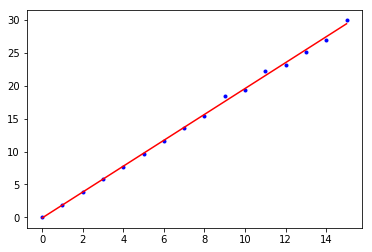

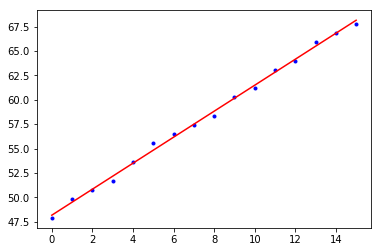

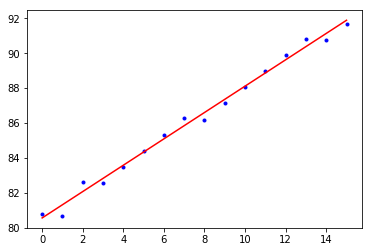

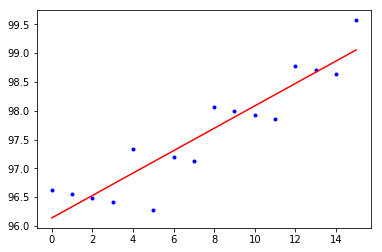

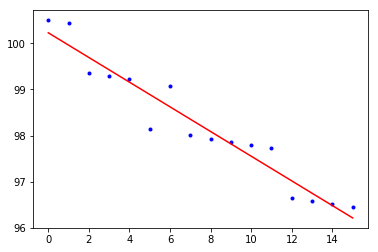

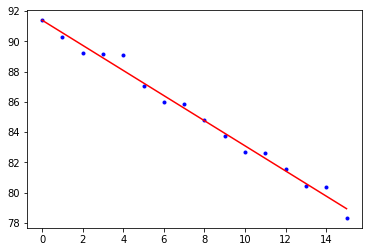

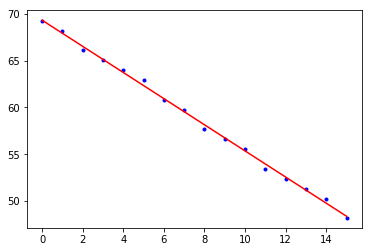

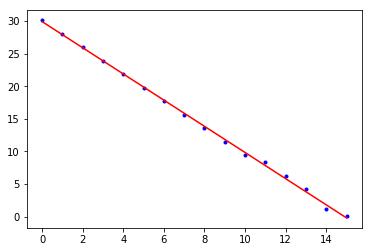

In [3]:
#summd = allofdata[0]
maxs = []
dat = allofdata[0]
for col in dat.columns:
    spectra = [dat[col.name]]
    for datatable in allofdata[1:-1]:
        spectra.append(datatable[col.name])
    medspec = np.median(np.asarray(spectra),axis=0)
    maxs.append(np.argmax(medspec))

maxs[16*5+4] = maxs[16*5+3] # one random bad fiber
maxs = np.asarray(maxs)
maxs -= maxs.min()

plt.figure()
plt.subplots(figsize=(10,10))
slope = (maxs[-1]-maxs[0])/len(maxs)
corctd_maxs = maxs-np.arange(len(maxs))*slope
allpixels = range(len(maxs))
plt.plot(allpixels,corctd_maxs,'b.')
plt.axhline(min(maxs))
print(1/slope)

def line(x,m,b):
    return m*x+b
ms,bs = [],[]
for i in np.arange(128//16):
    max_sub = corctd_maxs[i*16:(i+1)*16]
    good_bool = np.abs(max_sub[1:]-max_sub[:-1])<4
    mask = np.append([True],good_bool)
    max_sub = max_sub[mask]
    plt.figure()
    pixels = np.arange(max_sub.size)
    (slope,offset), cov = curve_fit(line,pixels,max_sub, p0=(0.5,0))
    plt.plot(range(len(max_sub)),max_sub,'b.')
    plt.plot(pixels,line(pixels,slope,offset),'r-')
    print(i,slope,offset)
    ms.append(slope)
    bs.append(offset)

In [ ]:
max(medspec)
slope = (a*tet+b*fib)
offset = (c*tet+d*fib)

without overall slope sub
14.222222222222221
0 2.0367647098517714 940.9117646761116
1 1.40441175151769 990.2794118633695
2 0.8264705535541629 1023.8014708479589
3 0.26470582002084225 1040.5147063498482
4 -0.19705858238932036 1045.72793936792
5 -0.8813185935068242 1037.6571422863658
6 -1.3264705985113872 1017.0735294890519
7 -1.9382352878863387 978.7867646591475

with overall slope sub
14.222222222222221
0 1.9664522003972271 940.9117647468718
1 1.3340992560485974 989.1544118296356
2 0.7561580501807659 1021.5514708736442
3 0.1943933484018494 1037.1397061369837
4 -0.2673714662035334 1041.2279422465267
5 -0.9639938539284334 1032.0120538005353
6 -1.3967830951338156 1010.3235294635036
7 -2.0085477951532975 970.9117647135118

0.9568005480580141 53.004946223282545 -6.972732898654156 1.9143688725561845 -0.5559698878839433
1.966452205885543=-104.31459833297231, 1.966452205885543=1.9143688725561845, -0.08823529411775434=0.9568005480580141
1.334099264707701=-7.790592314397711, 1.334099264707701=1.3583989846722413, 48.154411764810924=46.9890138726864
0.7561580882358536=57.02952207637197, 0.7561580882358536=0.8024290967882979, 80.55147058841096=79.07576140000648
0.19439338235227815=88.21850131114994, 0.19439338235227815=0.2464592089043547, 96.1397058825626=97.21704313001825
-0.2673713223723443=96.3982524511499, -0.2673713223723443=-0.3095106789795887, 100.22794116779258=101.41285906272171
-0.8306066166836324=78.71468969928146, -0.8306066166836324=-0.8654805668635321, 91.38970587512725=91.66320919811685
-1.3967830883032162=34.56462995845383, -1.3967830883032162=-1.4214504547474751, 69.32352941227413=67.96809353620367
-2.0085477941231185=-44.29052508868274, -2.0085477941231185=-1.9774203426314185, 29.911764705947597

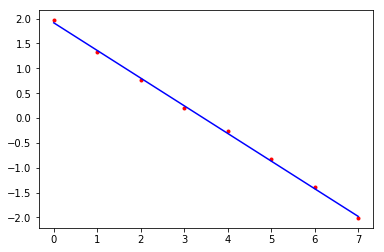

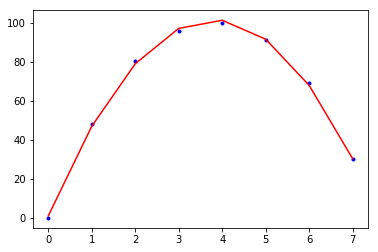

In [4]:
def tetfit(b,c1,c2,c3,c4):
    return ( (c3 * (b-c2) )/c1 ) + c4
def bfit(tet,c1,c2,c3):
    return c1+(c2*tet)+(c3*tet*tet)
def mfit(tet,c4,c5):
    return c4+(c5*tet)
#(c1,c2,c3,c4), cov = curve_fit(tetfit,bs,ms,p0=(0.1,200,0.1,0))
tets = np.arange(8).astype(np.float64)
(c1,c2,c3), cov = curve_fit(bfit,tets,bs,p0=(1000,-0.1,-0.1))
(c4,c5), cov = curve_fit(mfit,tets,ms,p0=(2,-0.1))

print(c1,c2,c3,c4,c5)
for i in range(8):
    print("{}={}, {}={}, {}={}".format(ms[i],tetfit(bs[i],c1,c2,c4,c4),\
                                       ms[i],mfit(np.float64(i),c4,c5),\
                                       bs[i],bfit(np.float64(i),c1,c2,c3)     ))
plt.figure()
plt.plot(tets,ms,'r.')
plt.plot(tets,mfit(tets,c4,c5),'b-')
plt.figure()
plt.plot(tets,bs,'b.')
plt.plot(tets,bfit(tets,c1,c2,c3),'r-')

(1.9143688725561845 + -0.5559698878839433*tet)*fib + (0.9568005480580141+53.004946223282545*te+-6.972732898654156*tet*tet)


<Figure size 432x288 with 0 Axes>

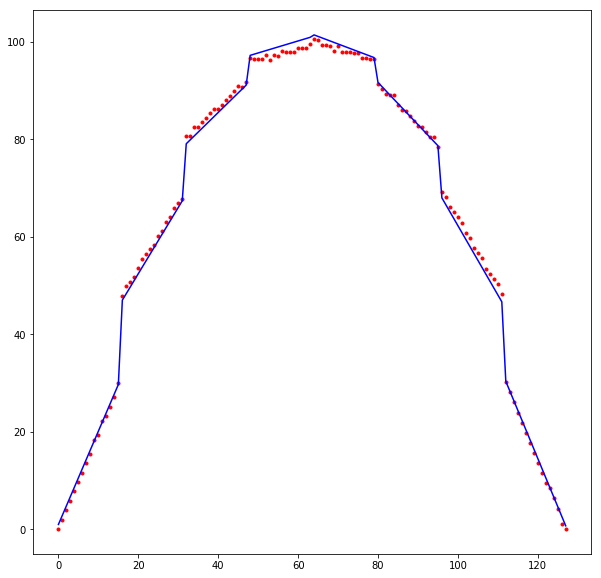

In [5]:
def master_eq(x,c1,c2,c3,c4,c5):
    tet = x//16
    fib = x%16
    m = c4+(c5*tet)
    b = c1+(c2*tet)+(c3*tet*tet)
    return m*fib + b

plt.figure()
plt.subplots(figsize=(10,10))
allpixels = np.arange(maxs.size)
plt.plot(allpixels,corctd_maxs,'r.')

ys = master_eq(allpixels,c1,c2,c3,c4,c5)
plt.plot(allpixels,ys,'b-')
print('({} + {}*tet)*fib + ({}+{}*te+{}*tet*tet)'.format(c4,c5,c1,c2,c3))

(1.9846813679537523 + -0.5559698883320836*tet)*fib + (1.0289522356385987+54.057794999242724*tet+-6.962425595617535*tet*tet)
1.0957018708771773 0.522902437476064 1.0956786810427792


<Figure size 432x288 with 0 Axes>

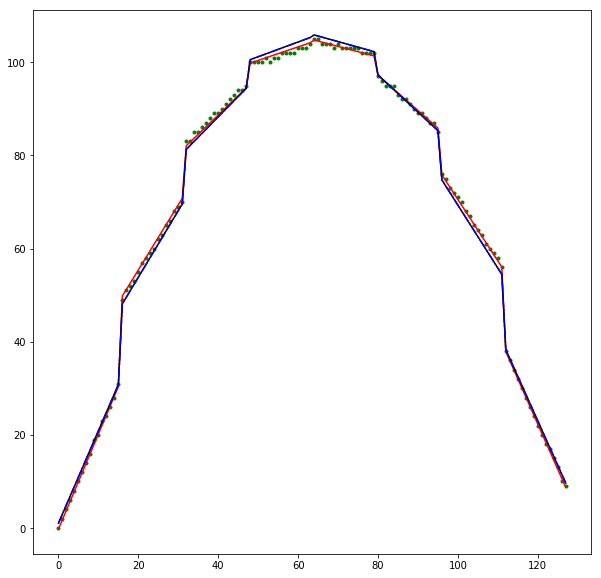

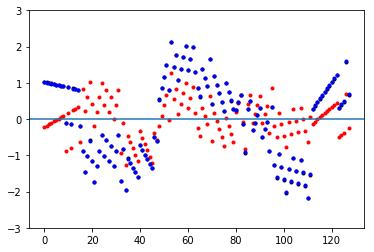

In [8]:
def master_equation(x):
    tet = x//16
    fib = x%16
    c1 =   1.023
    c2 =   54.058
    c3 =  -6.962
    c4 =   1.985
    c5 =  -0.5560
    return c1 + c2*tet + c3*tet*tet + c4*fib + c5*tet*fib

def master_eq_fitter5(x,c1,c2,c3,c4,c5):
    tet = x//16
    fib = x%16
    m = c4+(c5*tet)
    b = c1+(c2*tet)+(c3*tet*tet)
    return m*fib + b

def master_eq_fitter9(x,c1,c2,c3,c4,c5,c6,c7,c8,c9):
    tet = x//16
    fib = x%16
    m = c6+(c7*tet)+(c8*tet*tet)+(c9*tet*tet*tet)
    b = c1+(c2*tet)+(c3*tet*tet)+(c4*tet*tet*tet)+(c5*tet*tet*tet*tet)
    return m*fib + b

(d1,d2,d3,d4,d5), cov = curve_fit(master_eq_fitter5,allpixels,maxs,\
                                  p0=(942.,53.,-7.,1.9,-0.6))

(c1,c2,c3,c4,c5,c6,c7,c8,c9), cov = curve_fit(master_eq_fitter9,allpixels,maxs,\
                                  p0=(942.,53.,-7.,0.,0.,0.,1.9,-0.6,0.))
plt.figure()
plt.subplots(figsize=(10,10))
allpixels = np.arange(maxs.size)
plt.plot(allpixels,maxs,'g.')

ys5 = master_eq_fitter5(allpixels,d1,d2,d3,d4,d5)
ys9 = master_eq_fitter9(allpixels,c1,c2,c3,c4,c5,c6,c7,c8,c9)
plt.plot(allpixels,ys9,'r-')
plt.plot(allpixels,ys5,'k-')
plt.plot(allpixels,master_equation(allpixels),'b-.')
print('({} + {}*tet)*fib + ({}+{}*tet+{}*tet*tet)'.format(d4,d5,d1,d2,d3))

plt.figure()
plt.plot(allpixels,ys9-maxs,'r.')
plt.plot(allpixels,ys5-maxs,'k.')
plt.plot(allpixels,master_equation(allpixels)-maxs,'b.')
plt.axhline(0)
plt.ylim(-3,3)
print(np.std(master_equation(allpixels)-maxs),np.std(ys9-maxs),np.std(ys5-maxs))